## Motivation

The majority of the time, our standard "build a model" workflow involves splitting a dataset up into train, test, and validation sets. However, this is all predicated on having enough data to split and derive meaningful inference.

In the event that we have a smaller dataset, we might employ the *bootstrap* method of oversampling from our population, with replacement, many times. Done enough times, we arrive at

### Example, Before Bootstrap

Chapter 5 of ISL has a suggests some hypothetical statistic that they want to measure.

Basically you've got two stock portfolios, `X` and `Y`, and you want to spend `alpha` percent of your money on one and `1 - alpha` on the other. How might we find an `alpha` value that minimizes the variance?

$\min_\alpha Var(\alpha X + (1 - \alpha) Y)$

Using Math™, we arrive at an equation

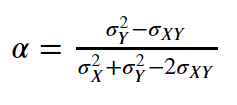

In [1]:
from IPython.display import Image

Image('images/bootstrap_alpha.PNG')

Then, if we took 1000 samples, each with 100 pairs `(X, Y)`, we could calculate these `sigma` values for each sample, plug them in, and get *one* value for `alpha`.

Done enough times, we get a *mean* value for this statistic.

They calculated this to be `0.5996`

Similarly, the standard deviation for the estimate is

$\sqrt{\frac{1}{1000 - 1}\sum_{r=1}^{1000}(\hat{\alpha}_r - \bar{\alpha})^2}$

Equaling `0.083`.

Thus, we'd want to set our strategy according to

$\alpha = 0.5996 \pm 0.083$

However, what if our original dataset wasn't big enough for us to draw multiple samples of size 100?

Furthermore, this approach becomes less-valid when 

### Example, with Bootstrap

For demonstration, what if our data still followed the same distribution, but only contained *3 points*?

We still want to generate 1000 sampled datasets using our original data, but as stated above, the bootstrap method involves sampling from our original population *with replacement* and following the same approach as above for calculating our desired statistic, `alpha`.

This looks like the following

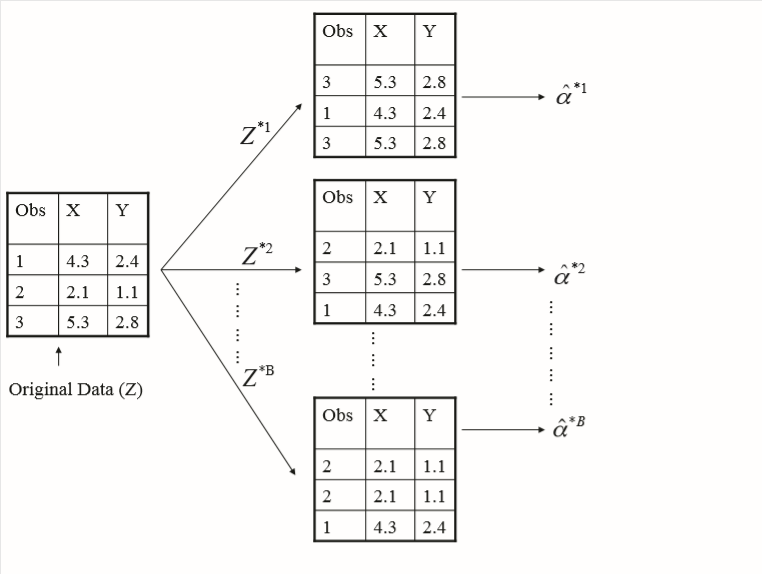

In [2]:
Image('images/fig_5_11.PNG')

Calculating the average value of the `alpha` statistic is still a naive "sum of `alpha`, divided by the count".

And generalizing the formula for the Standard Error looks like

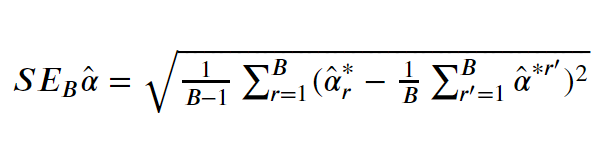

In [3]:
Image('images/bootstrap_se_alpha.PNG')

Where:

- `B` is the number of Bootstrap samples
- The `1/B ... a_hat^*r'` term is the average value for `alpha`

But as for as busy as this looks, this is *very* similar to your basic standard error calculation-- we find the sample mean, then find the standard deviation of it as the square root of the sum of squared distances.

The only, and critical, difference here is that we take **many** Bootstrap samples when calculating the "mean value" with which we do the sum of squared residual calculation on.

Following with the example in the book, the calculated Standard Error for `alpha` was `0.087`, which is obviously *very* close to the value calculated above.

This should highlight the power of using the Bootstrap technique, espcially for estimating Standard Errors, and by extension Confidence Intervals-- something that a method like Cross Validation does not.

## Sampling Probability

An interesting consequence of using the bootstrap method is that **we wind up using about 2/3 of the data points in our population**, as highlighted by Exercise 5.2 in ISL.

The intuition is as follows:

- If we have `n` points, then the probability that we pick a point `j` in our bootstrapping is `1/n`
- Conversely, the probability for any given pick that we *don't have* `j` is `1 - 1/n`, with replacement
- So if we pick two bootstrap observations, the probability of not finding the point `j`, is the probability of not finding `j`, squared.
- Extending, if we drew `n` observations from `n` numbers, the probability of not finding `j` is `(1 - 1/n)^n`
- Reversing once more, *one minus this term* gives us "what's the probability that `j` is **in** the sample?
- This allows us to answer for when `n=5`

In [4]:
1 - (1 - (1/5)) ** 5

0.6723199999999999

`n=100`

In [5]:
1 - (1 - (1/100)) ** 100

0.6339676587267709

`n=10000000`

In [6]:
1 - (1 - (1/10000000)) ** 10000000

0.632120577028895

So not necessarily `.666667`, but damn close, eh?